In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

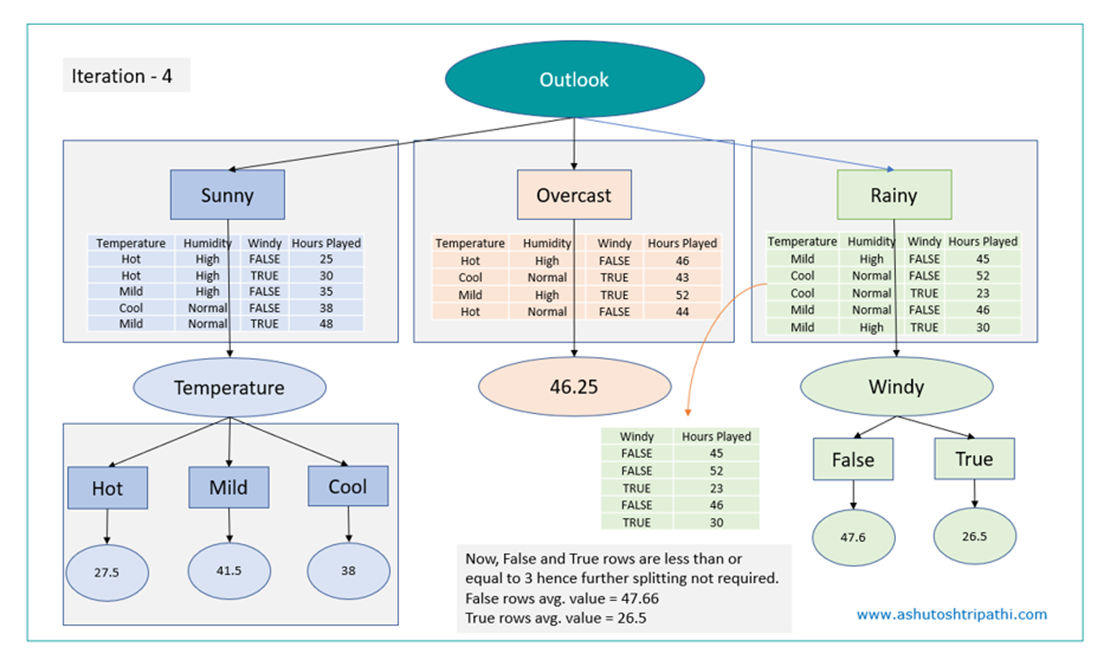

### Profit~ rnd, mkt, admin, state

### Seperating x and y values

In [7]:
x = df.drop(columns=['PROFIT'])
y = df[['PROFIT']]

In [8]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Perform cat con seperation on x only

In [10]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [11]:
cat,con

(['STATE'], ['RND', 'ADMIN', 'MKT'])

### create preprocessing pipeline for both num and cat data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
# num pipeline
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('Scaler', StandardScaler())])

In [14]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
# combine both num and cat pipeline
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [16]:
# pre is an object
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

### Preprocess the data

In [17]:
x_pre = pre.fit_transform(x)
x_pre[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  0.        ,  0.        ,
         1.        ],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.        ,  0.        ,
         0.        ],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ,  1.        ,
         0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  0.        ,  0.        ,
         1.        ],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ,  1.        ,
         0.        ]])

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [19]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Apply train test spit on x_pre and y data now

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=30)

In [21]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
22,0.006007,0.051850,0.762376,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
40,-0.989577,-0.100900,-0.315786,1.0,0.0,0.0
9,1.091819,-0.456640,0.776107,1.0,0.0,0.0
26,0.035370,0.821718,-0.635835,0.0,1.0,0.0


In [22]:
ytrain.head()

,PROFIT
22,110352.25
21,111313.02
40,78239.91
9,149759.96
26,105733.54


In [23]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
41,-1.008534,-1.320796,-0.384552,0.0,1.0,0.0
20,0.055726,-0.269588,0.723926,1.0,0.0,0.0
32,-0.226949,0.283924,-1.362450,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
10,0.620398,-0.387599,0.149807,0.0,1.0,0.0


In [24]:
ytest.head()

,PROFIT
41,77798.83
20,118474.03
32,97427.84
43,69758.98
10,146121.95


In [25]:
xtrain.shape

(40, 6)

In [26]:
xtest.shape


(10, 6)

### Decision tree regression model creation

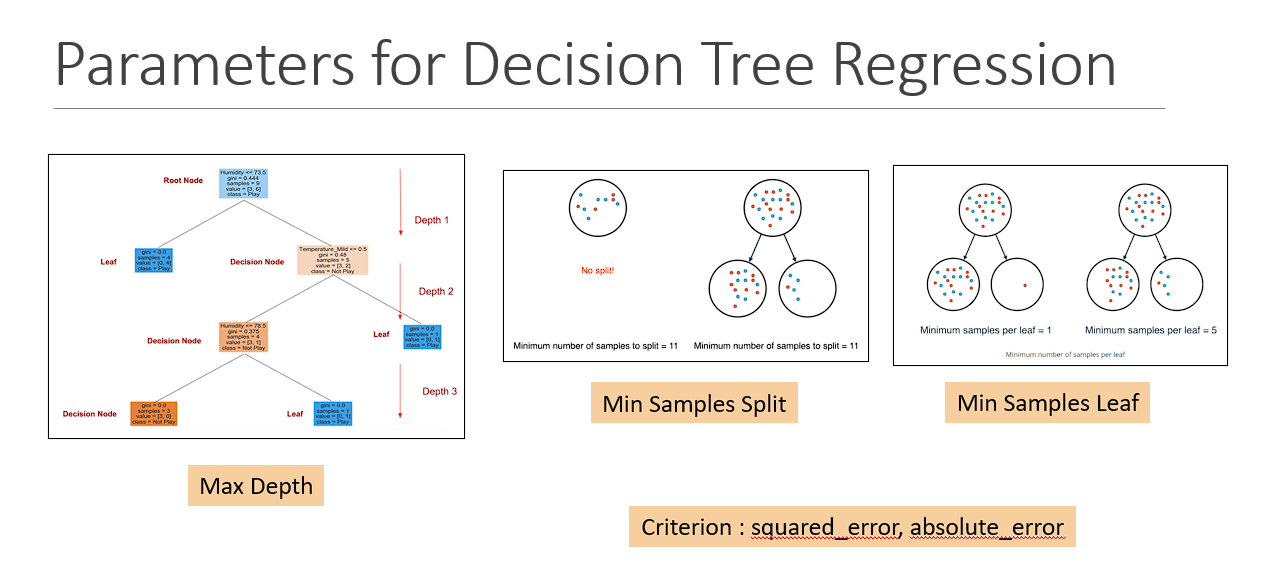

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1, min_samples_split=5, min_samples_leaf=6, criterion='squared_error')
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=5)

In [28]:
model.score(xtrain,ytrain)

0.6545771206892594

In [29]:
model.score(xtest, ytest)

0.033287011218209206

# here we are not getting good score so we are using hyperparameter tunung instead of selecting random values

In [30]:
params ={
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[5,6,7,8,9,10],
        'min_samples_leaf':[3,4,5,6,7,8,9],
        'criterion':['squared_erroe','absolute_error']
        }

In [31]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_erroe', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [32]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [33]:
gscv.best_score_

-221841030.26770443

In [36]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=3, min_samples_split=5)

In [38]:
best_dtr.score(xtrain,ytrain)

0.9621587096675778

In [39]:
best_dtr.score(xtest,ytest)

0.8769128947266548

### Predicting model results

In [40]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [42]:
ypred_tr[0:5]

array([ 80986.9247619 , 150823.54473684,  80986.9247619 , 150823.54473684,
        80986.9247619 ])

In [43]:
ytrain.head()

,PROFIT
22,110352.25
21,111313.02
40,78239.91
9,149759.96
26,105733.54


In [44]:
ypred_ts[0:5]

array([ 80986.9247619 ,  80986.9247619 ,  80986.9247619 ,  80986.9247619 ,
       150823.54473684])

In [45]:
ytest.head()

,PROFIT
41,77798.83
20,118474.03
32,97427.84
43,69758.98
10,146121.95


### Check model mse, mae, rmse, r2

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
def evaluate_model(x,y,model):
    # predict y for training and testing results
    ypred = model.predict(x)
    # evaluate the model
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    r2 = r2_score(y,ypred)
    # print all the results

    print(f'Mean squared error is : {mse:.2f}')
    print(f'Root mean squared error is: {rmse:.2f}')
    print(f'Mean squared error is: {mae:.2f}')
    print(f'r2 score is : {r2:.4f}')

In [47]:
evaluate_model(xtrain,ytrain,best_dtr)

Mean squared error is : 70311190.58
Root mean squared error is: 8385.18
Mean squared error is: 5503.79
r2 score is : 0.9622


In [48]:
evaluate_model(xtest,ytest,best_dtr)

Mean squared error is : 53678065.51
Root mean squared error is: 7326.53
Mean squared error is: 5465.87
r2 score is : 0.8769


### Plot the decision tree

In [49]:
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=3, min_samples_split=5)

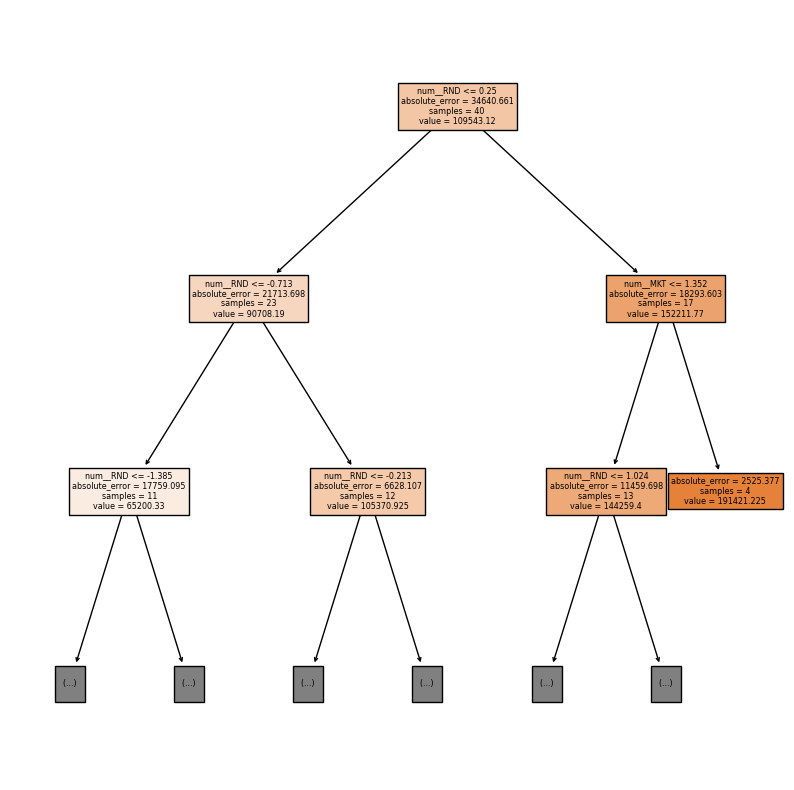

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,filled=True,max_depth=2)
plt.show()

### Plot feature importance

In [51]:
imp = best_dtr.feature_importances_
imp

array([0.86965514, 0.        , 0.13034486, 0.        , 0.        ,
       0.        ])

In [52]:
xtrain.columns

Index(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'],
      dtype='object')

In [54]:
imp = pd.Series(imp)
imp

0    0.869655
1    0.000000
2    0.130345
3    0.000000
4    0.000000
5    0.000000
dtype: float64

In [56]:
imp.index = xtrain.columns
imp

num__RND                 0.869655
num__ADMIN               0.000000
num__MKT                 0.130345
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

In [57]:
imp = imp.sort_values(ascending=False)
imp

num__RND                 0.869655
num__MKT                 0.130345
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

<Axes: title={'center': 'Feature importances'}>

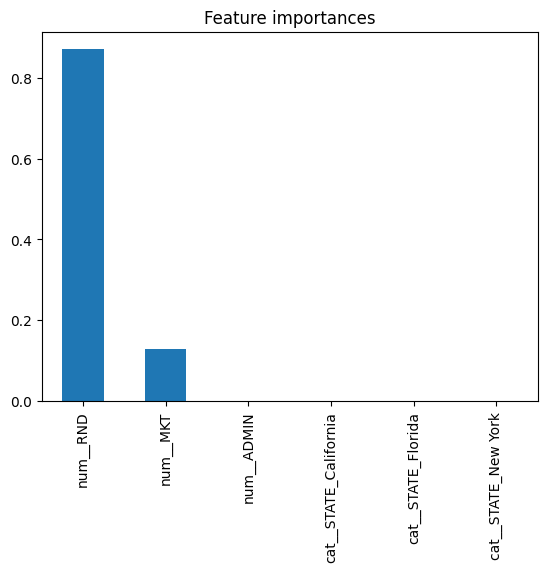

In [58]:
imp.plot(kind='bar',title='Feature importances')

### RnD is most important feature to predict profit

### Predicting out of sample data

In [59]:
xnew = pd.read_csv('test.csv')
xnew

,RND,ADMIN,MKT,STATE
0,78013.11,121597.55,264346.06,California
1,22177.74,154806.14,28334.72,California
2,23640.93,96189.63,148001.11,California
3,101913.08,110594.11,229160.95,Florida
4,77044.01,99281.34,140574.81,New York
5,542.05,51743.15,0.00,New York
6,61136.38,152701.92,88218.23,New York
7,100671.96,91790.61,249744.55,California
8,28663.76,127056.21,201126.82,Florida
9,20229.59,65947.93,185265.10,New York


## perform .transform on xnew

In [60]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[ 0.0944412 ,  0.00911842,  0.44044622,  1.        ,  0.        ,
         0.        ],
       [-1.13430539,  1.20641936, -1.50907418,  1.        ,  0.        ,
         0.        ],
       [-1.10210556, -0.90693753, -0.52059596,  1.        ,  0.        ,
         0.        ],
       [ 0.62039825, -0.38759909,  0.14980727,  0.        ,  1.        ,
         0.        ],
       [ 0.0731146 , -0.79546917, -0.5819393 ,  0.        ,  0.        ,
         1.        ]])

In [61]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.094441,0.009118,0.440446,1.0,0.0,0.0
1,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
2,-1.102106,-0.906938,-0.520596,1.0,0.0,0.0
3,0.620398,-0.387599,0.149807,0.0,1.0,0.0
4,0.073115,-0.795469,-0.581939,0.0,0.0,1.0


#### Estimate the profits of these startups

In [62]:
preds = best_dtr.predict(xnew_pre)
preds

array([108643.015,  79622.835,  79622.835, 132602.65 , 108643.015,
        42559.73 ,  96981.535, 132602.65 ,  79622.835,  79622.835,
        42559.73 , 132602.65 ,  96981.535, 155937.555,  79622.835])

##### save the above profit results to xnew 

In [63]:
xnew['Profit_pred'] = preds
xnew

,RND,ADMIN,MKT,STATE,Profit_pred
0,78013.11,121597.55,264346.06,California,108643.015
1,22177.74,154806.14,28334.72,California,79622.835
2,23640.93,96189.63,148001.11,California,79622.835
3,101913.08,110594.11,229160.95,Florida,132602.650
4,77044.01,99281.34,140574.81,New York,108643.015
5,542.05,51743.15,0.00,New York,42559.730
6,61136.38,152701.92,88218.23,New York,96981.535
7,100671.96,91790.61,249744.55,California,132602.650
8,28663.76,127056.21,201126.82,Florida,79622.835
9,20229.59,65947.93,185265.10,New York,79622.835


#### save above file in result_dtr.csv format

In [ ]:
xnew.to_csv('Results_dtr.csv', index=False)